# **Multiple Linear Regression**

In [1]:
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

data = []

for _ in range(500):
    team_name = f"Team {chr(random.randint(65,90))}"
    season = random.randint(2010, 2023)
    wins = random.randint(50, 110)
    losses = 162 - wins
    hits = random.randint(1200,1600)
    doubles = random.randint(200,350)
    triples = random.randint(10,40)
    home_runs = random.randint(100,250)
    strikeouts = random.randint(1000,1500)

    hits_adjusted = hits + (wins-80) * 5
    doubles_adjusted = doubles + (wins-80) * 2
    triples_adjusted = triples + (wins-80) * 3
    home_runs_adjusted = home_runs + (wins-80) * 3
    strikeouts_adjusted = strikeouts - (wins - 80) * 10

    data.append([team_name, season, wins, losses, hits_adjusted, doubles_adjusted, triples_adjusted, home_runs_adjusted, strikeouts_adjusted])

In [2]:
columns = ["Team", 'Season', 'Wins',"Losses", 'Hits', 'Doubles', "Tripples", 'HomeRuns', 'Strikesouts']

df = pd.DataFrame(data, columns=columns)
df

,Team,Season,Wins,Losses,Hits,Doubles,Tripples,HomeRuns,Strikesouts
0,Team R,2018,68,94,1516,197,-17,172,1582
1,Team Y,2023,65,97,1344,275,-6,153,1495
2,Team U,2017,62,100,1457,197,-26,152,1454
3,Team U,2011,62,100,1182,233,-28,68,1271
4,Team N,2016,75,87,1248,233,0,194,1058
...,...,...,...,...,...,...,...,...,...
495,Team D,2010,56,106,1106,152,-40,173,1341
496,Team O,2022,104,58,1587,310,93,307,1130
497,Team F,2019,106,56,1612,402,104,285,1224
498,Team Y,2010,64,98,1320,178,-30,126,1204


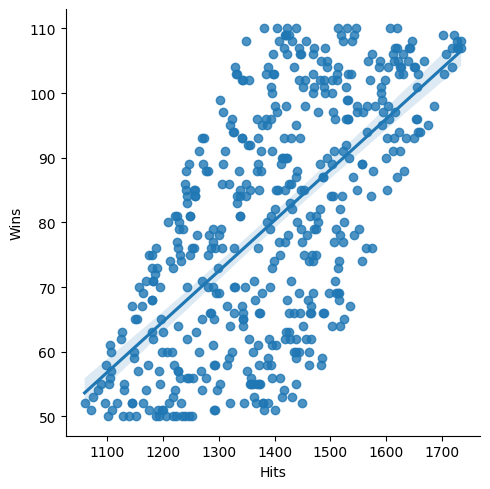

In [3]:
sns.lmplot(x="Hits", y="Wins", data=df)

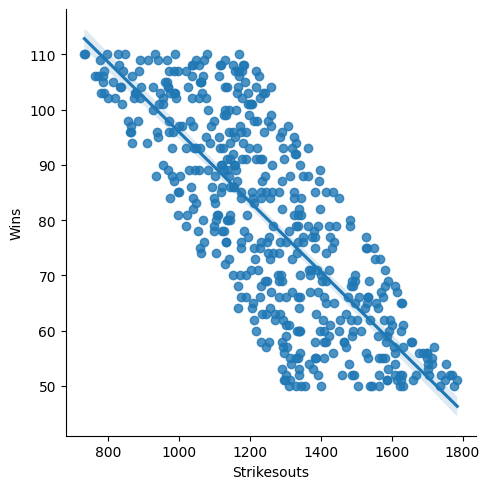

In [4]:
sns.lmplot(x="Strikesouts", y="Wins", data=df)

In [5]:
df2 = df.drop(columns=['Team', 'Season', 'Losses'], axis=1)
df2

,Wins,Hits,Doubles,Tripples,HomeRuns,Strikesouts
0,68,1516,197,-17,172,1582
1,65,1344,275,-6,153,1495
2,62,1457,197,-26,152,1454
3,62,1182,233,-28,68,1271
4,75,1248,233,0,194,1058
...,...,...,...,...,...,...
495,56,1106,152,-40,173,1341
496,104,1587,310,93,307,1130
497,106,1612,402,104,285,1224
498,64,1320,178,-30,126,1204


In [6]:
df2.columns

Index(['Wins', 'Hits', 'Doubles', 'Tripples', 'HomeRuns', 'Strikesouts'], dtype='object')

In [7]:
X = df[['Hits', 'Doubles', 'Tripples', 'HomeRuns', 'Strikesouts']]
y = df['Wins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
lr.score(X_test, y_test)

0.9766876951321011

In [9]:
lr.score(X_train, y_train)

0.9779524643162276

In [10]:
y_pred = lr.predict(X_test)
y_pred

array([ 79.43521812,  84.98752505,  50.06532199,  86.3822643 ,
        70.2017775 , 105.95777075, 112.95922339,  63.40753436,
        69.69225294,  61.45407411, 109.65817756,  91.24687093,
        53.51602938,  93.85145009,  52.19256777, 103.42618223,
        93.19739631,  49.75559028,  69.68435674,  66.0810152 ,
        55.59211481,  55.51175199,  83.75514524,  87.95757516,
        80.68253472,  89.01173975,  66.41065628,  51.2704802 ,
       114.21228759, 100.30212302,  88.33733575,  78.18776603,
        84.57104209,  55.42473415,  68.36036516,  77.72199593,
        63.81868048,  78.23857521,  95.88171008,  46.68880483,
       106.20061061,  99.65684269, 102.86836133,  76.59226093,
        97.43890582,  76.61837152,  67.35962044,  96.54023581,
        98.99463936,  56.07128436,  73.84535217,  66.34627102,
       100.5049504 ,  74.42990629,  66.88490465, 103.15534167,
        97.23129157,  64.7906051 ,  69.02154043,  67.47991565,
        62.22324859,  57.34789107, 103.81785868,  97.64

In [11]:
mean_absolute_error(y_test, y_pred)

2.394583294287179

In [12]:
root_mean_squared_error(y_test, y_pred)

2.7715279457881903

In [13]:
r2_score(y_test, y_pred)

0.9766876951321011

In [14]:
lr.coef_

array([ 0.00362517,  0.00364042,  0.29551377,  0.01535465, -0.00312123])

In [15]:
lr.intercept_

67.51826690267674